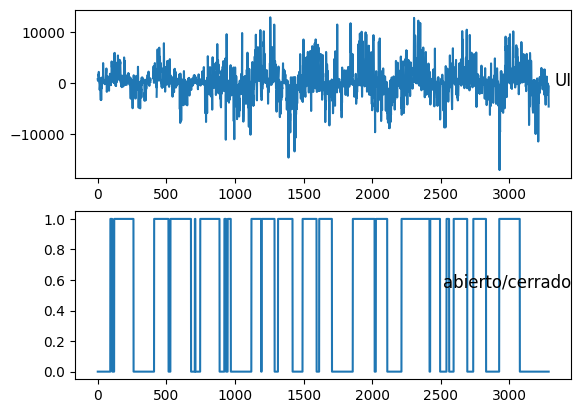

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('../data/processed/cangas_IU.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0,1]
i = 1
# plot each column
plt.figure()
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam


In [8]:
# Cargar los datos desde un archivo CSV
data = pd.read_csv('../data/processed/cangas_IU.csv')

# Convertir la columna 'fecha' a un tipo de datos de fecha
data['fecha'] = pd.to_datetime(data['fecha'])


In [9]:
# Función de normalización
def normalize(values):
    min_val = np.min(values)
    max_val = np.max(values)
    return (values - min_val) / (max_val - min_val), min_val, max_val

# Normalizar UI
data['UI'], ui_min, ui_max = normalize(data['UI'])

# Convertir fecha a valores numéricos
data['fecha'] = data['fecha'].map(pd.Timestamp.toordinal)
data['fecha'], fecha_min, fecha_max = normalize(data['fecha'])

# Características y etiquetas
X = data[['fecha', 'UI']]
y = data['abierto/cerrado']

# Reshape los datos para LSTM
X = np.array(X).reshape((len(X), 1, X.shape[1]))

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [10]:
# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3831 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3876 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3702 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3676 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3890 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3866 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3756 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3913 - loss: nan - val_accuracy: 0.5334 - val_loss: nan
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s

In [12]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.3599 - loss: nan   
Loss: nan, Accuracy: 0.5334346294403076


In [13]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Convertir las predicciones a valores binarios
y_pred_bin = (y_pred > 0.5).astype(int)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [14]:
import matplotlib.pyplot as plt


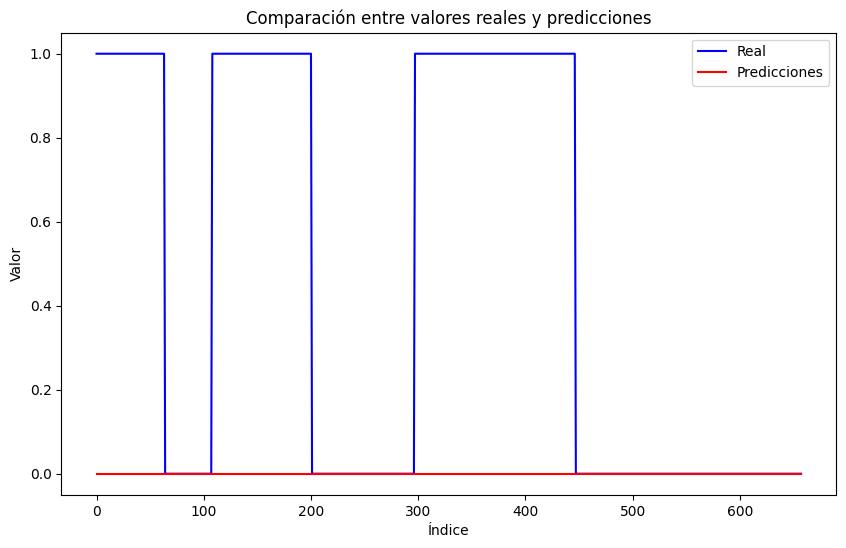

In [15]:
# Crear una figura y un eje para el gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test.values, label='Real', color='blue')

# Graficar las predicciones
plt.plot(y_pred_bin, label='Predicciones', color='red')

# Añadir etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()
